# Airline Delay Analysis

This analysis is based on the sample data collected from the population comes originally from The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) for the year 2008.



In [26]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir("D:\\MSBIA\\Python Projects")

In [12]:
df=pd.read_csv(r'airlineDataFinalcopy.csv')
df.head()

,DepDelay,Year,Month,DayofMonth,DayOfWeek,Departure Time,CRSDepTime,Arrival Time,CRSArrTime,UniqueCarrier,...,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,8,2008,4,13,7,993,985,1059,1070,WN,...,N297WN,66,85,53,-11,LAX,SFO,337,4,9
1,6,2008,12,13,6,741,735,1028,1050,WN,...,N611SW,167,195,157,-22,LAX,MCI,1363,4,6
2,68,2008,6,8,7,1348,1280,1419,1355,WN,...,N920WN,71,75,60,64,LAX,SMF,373,4,7
3,22,2008,2,10,7,1052,1030,1120,1105,WN,...,N283WN,68,75,57,15,LAX,SMF,373,5,6
4,36,2008,12,4,4,731,695,810,775,WN,...,N621SW,79,80,66,35,LAX,SMF,373,4,9


# Descriptive Analysis

In [32]:
df[['DepDelay','UniqueCarrier']].groupby("UniqueCarrier").describe()



DepDelay                                                     
                 count       mean        std  min   25%   50%    75%    max
UniqueCarrier                                                              
AS              2331.0  40.402831  58.442902  6.0  11.0  21.0   44.0  691.0
B6              1065.0  75.244131  77.295185  6.0  21.0  47.0  102.0  504.0
DL              3763.0  37.647622  45.980461  6.0  11.0  21.0   44.0  512.0
HA               225.0  45.937778  80.151729  6.0  10.0  19.0   38.0  550.0
WN              3613.0  33.030722  35.480071  6.0  11.0  21.0   41.0  411.0

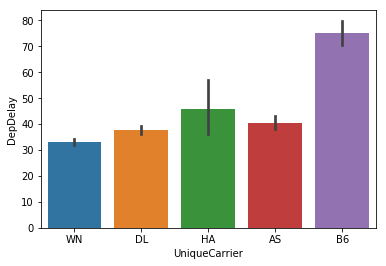

In [34]:
sns.barplot(data=df,x='UniqueCarrier',y='DepDelay')
plt.show()

we observe that Jet blue (B6) has the highest average departure delay time of 75 minutes and Southwest Airlines Co. (WN) has the lowest average departure delay time of 33 minutes compared to other airlines. There is no significant difference exist between Alaska (AS) and Delta(DL) airline. 

In [30]:
df[['ArrDelay','UniqueCarrier']].groupby("UniqueCarrier").describe()


ArrDelay                                                      
                 count       mean        std   min   25%   50%    75%    max
UniqueCarrier                                                               
AS              2331.0  39.820249  60.432950 -42.0   8.0  23.0   48.0  679.0
B6              1065.0  77.444131  81.707833 -36.0  22.0  52.0  110.0  481.0
DL              3763.0  38.476747  49.494276 -29.0   9.0  22.0   49.0  507.0
HA               225.0  43.466667  81.222963 -17.0   5.0  18.0   39.0  544.0
WN              3613.0  27.114309  37.372055 -38.0   4.0  16.0   37.0  410.0

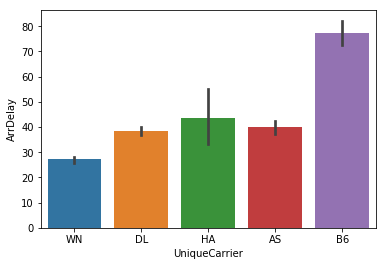

In [35]:
sns.barplot(data=df,x='UniqueCarrier',y='ArrDelay')
plt.show()

We can observe that Jet blue(B6) also has the highest arival delay time.

In [24]:
df[['DepDelay','UniqueCarrier','Origin']].groupby("Origin").describe()

DepDelay                                                     
          count       mean        std  min   25%   50%    75%    max
Origin                                                              
ATL      3296.0  37.085862  43.810375  6.0  12.0  21.0  44.00  468.0
DEN      2216.0  38.800090  49.339870  6.0  12.0  22.0  46.00  691.0
DFW       248.0  43.717742  64.074294  6.0  10.0  21.5  40.25  399.0
LAX      4006.0  34.143035  43.507994  6.0  11.0  20.0  40.00  550.0
ORD      1231.0  72.967506  80.448624  6.0  17.0  41.0  97.00  517.0

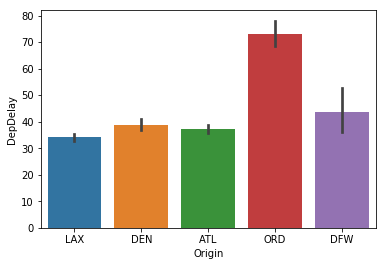

In [36]:
sns.barplot(data=df,x='Origin',y='DepDelay')
plt.show()

Chicago O'Hare international airport (ORD) has the highest departure delay time of 73 minutes compared to all other airports.

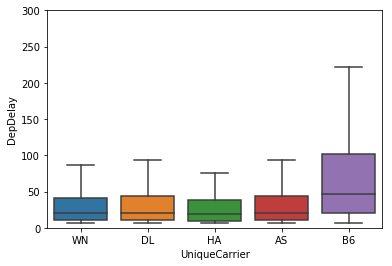

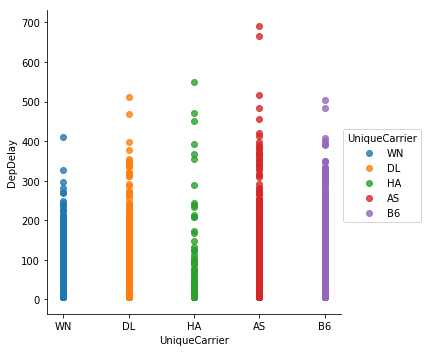

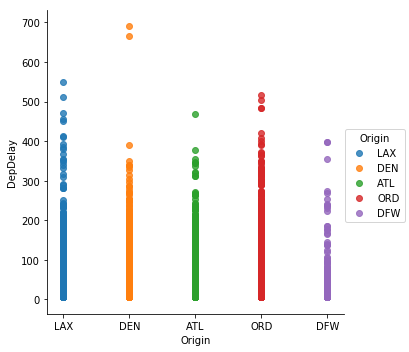

In [37]:
f,axes=plt.subplots(1,1)
plt.ylim((0,300))
sns.lmplot(data=df,x='UniqueCarrier',y='DepDelay',fit_reg=False,hue='UniqueCarrier')
sns.lmplot(data=df,x='Origin',y='DepDelay',fit_reg=False,hue='Origin')
sns.boxplot(data=df,x='UniqueCarrier',y='DepDelay',ax=axes,fliersize=0)
plt.show()

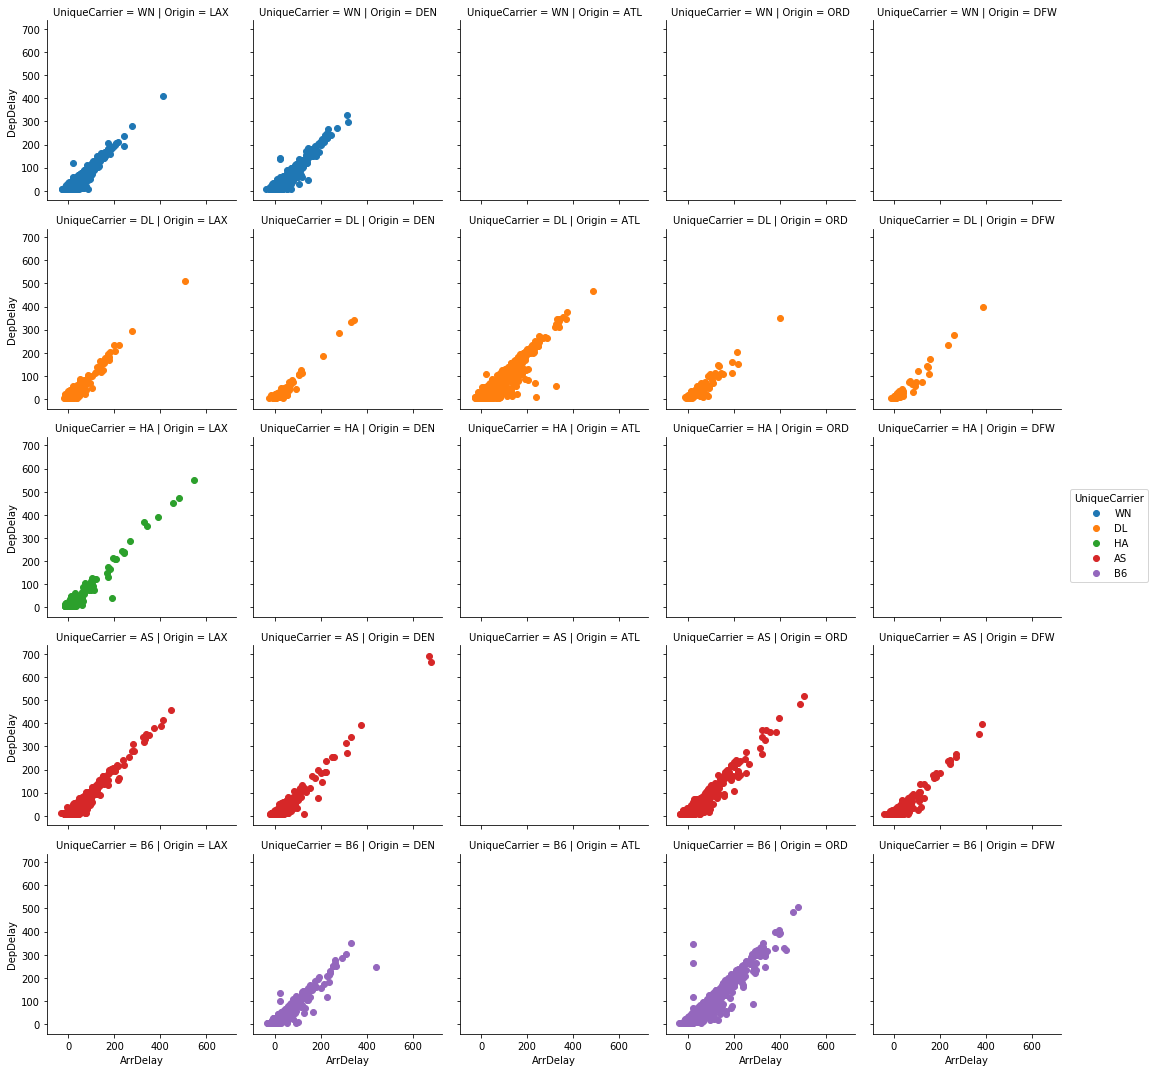

In [42]:
g=sns.FacetGrid(df,row='UniqueCarrier',col='Origin',hue='UniqueCarrier')
g=g.map(plt.scatter,'ArrDelay','DepDelay')
g.add_legend()
plt.show()

In [81]:
df.Month = df.Month.astype('object')
df.DayOfWeek = df.DayOfWeek.astype('object')

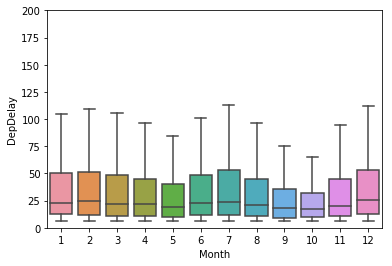

In [90]:
f,axes=plt.subplots(1,1)
plt.ylim((0,200))
sns.boxplot(data=df,x='Month',y='DepDelay',ax=axes,fliersize=0)
plt.show()


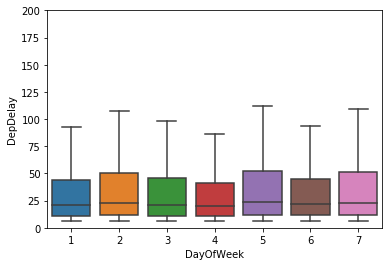

In [91]:
f,axes=plt.subplots(1,1)
plt.ylim((0,200))
sns.boxplot(data=df,x='DayOfWeek',y='DepDelay',ax=axes,fliersize=0)
plt.show()

From above analysis we can say that July(7) and December(12) has more delay in airlines as these months are holiday period and weekends has more delay in flights than weekdays.

# Correlation Matrix

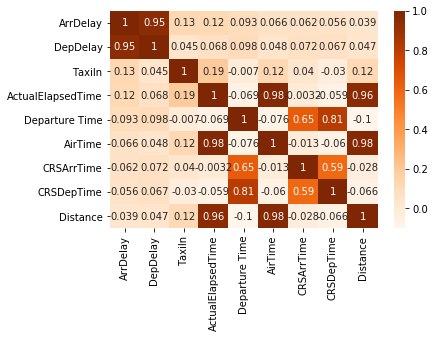

In [106]:
sns.heatmap(df[['ArrDelay','DepDelay','TaxiIn','ActualElapsedTime','Departure Time','AirTime',
                'CRSArrTime','CRSDepTime','Distance']].corr(),cmap="Oranges", annot = True)
plt.show()

From above correlation matrix it is clear that the arrival delay is highly correlated to departure delay. Thus, a flight departing late is very likely to arrive late at destination airport.

In [119]:
df_new=df.groupby(['Month','DayOfWeek'],as_index=False)['DepDelay'].mean()
df_pivot=df_new.pivot('Month','DayOfWeek','DepDelay')

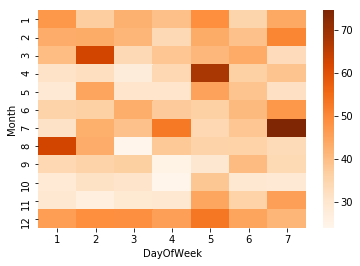

In [120]:
sns.heatmap(df_pivot,cmap='Oranges')
plt.show()

On an average Sunday(7) of July(7) month has highest delay time.

 ------------------------------------------------------------

# Conclusion

From the above analysis we can conclude that 
1. Jet blue is delayed more often and has high delay time compared to other carriers.
2. Chicago being a busiest airport has highest departure delay time.
3. July is busiest month of the year to travel and has maximum delays.